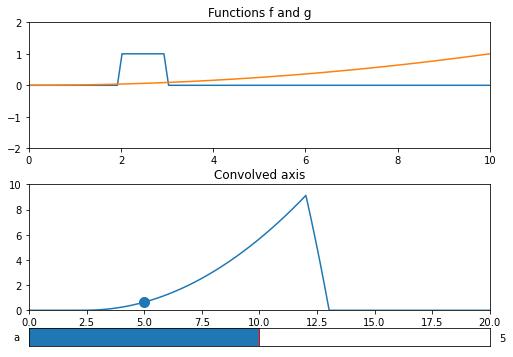

In [2]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider


# Function settings
startTime = 0
endTime = 10
amountOfTimeSteps = 100
timeStepsPerSecond = amountOfTimeSteps/(endTime - startTime)

# slider settings
delta_time = 3
initialValue = 5


def h(a,t):
    return (a*t)**2 

def u(tau, t):
    if t <= tau + 1 and t >= tau:
        return 1
    return 0

def flip(myList):
    return myList[::-1]    

def shift(myList, a):
    pass

def createU(a):
    inputFunction = []
    time = np.linspace(0,10, amountOfTimeSteps)
    for t in time:
        inputFunction.append(u(a, t))
    return inputFunction

# Create the transfer and input function
time = np.linspace(0,10, amountOfTimeSteps)
transfer = h(0.1, time)
inputFunction = createU(2)

# Create the convolution integral
y = np.convolve(transfer, inputFunction)
convolvedTime = np.linspace(0,20, len(y))

# Create figure and axes
fig = plt.figure(figsize=(8,5))
func_ax = plt.axes([0.1, 0.6, 0.8, 0.35])
conv_ax = plt.axes([0.1, 0.15, 0.8, 0.35])
slider_ax = plt.axes([0.1, 0.05, 0.8, 0.05])


# Plot functions
plt.axes(func_ax)
plt.title("Functions f and g")
plt.xlim(0, 10)
plt.ylim(-2, 2)
inputFunctionPlot, = plt.plot(time, inputFunction)
transferPlot, = plt.plot(time, transfer)

# Plot convolution
plt.axes(conv_ax)
plt.title("Convolved axis")
plt.xlim(0,20)
plt.ylim(0,10)
convolvedPlot, = plt.plot(convolvedTime, y)
pointPlot = plt.scatter(initialValue, y[int(initialValue*timeStepsPerSecond)] ,s=100)


# Create slider 
time_slider = Slider(slider_ax, 'a', initialValue- delta_time, initialValue+delta_time, valinit=initialValue)


def sliderUpdate(a):
    global pointPlot
    inputFunctionPlot.set_ydata(createU(a))
    convolvedPlot.set_ydata(np.convolve(transfer, inputFunction))
    pointPlot.remove()
    pointPlot = plt.scatter(a, y[int(a*timeStepsPerSecond)], s=100)
    fig.canvas.draw_idle()


time_slider.on_changed(sliderUpdate)


plt.show()
